In [2]:
import numpy as np
import random
import math
from numpy.linalg import svd
import scipy
from scipy.optimize import minimize,minimize_scalar
from numpy.linalg import inv

import os

os.getcwd()
from FunctionsIATS2 import gentime
from FunctionsCIAR import CIAR_sample,CIAR_phi_kalman,CIAR_kalman,forecast_CIAR,predict_CIAR

In [3]:
random.seed(6713)
sT=gentime(n=300)
y,sT,Sigma =CIAR_sample(n=300,sT=sT,phi_R=0.9,phi_I=0.0,rho=0,c=1)
y1=y/np.sqrt(np.var(y,ddof=1))
phi_R,phi_I,out=CIAR_kalman(y=y1,sT=sT,c=1,niter=4,seed=6713)
print(phi_R)
phi=complex(phi_R, phi_I)
Mod=abs(phi)
print(Mod)

0.8776412231345596
0.879961559530221


In [4]:
n=len(sT)
p=int(0.9*n)
ytr=y1[range(p)]
str=sT[range(p)]
yte=y1[range(p,n)]
ste=sT[range(p,n)]
n_ahead=ste-str[p-1]
n_ahead2=np.zeros(1)
print(len(n_ahead))

final=np.zeros(shape=(len(n_ahead),4))
for i in range(10):
    print(i)
    phi_R,phi_I,out=CIAR_kalman(y=ytr,sT=str,c=1,niter=4,seed=6713)
    n_ahead2[0]=ste[i]-str[len(str)-1]
    print(n_ahead2)
    fitted,forCIAR,Lambda2,Sighat2=forecast_CIAR(phi_R,phi_I,ytr,str,n_ahead=n_ahead2)
    final[i,]=np.hstack((phi_R,yte[i],forCIAR,n_ahead2))
    ytr=np.hstack((ytr,yte[i]))
    str=np.hstack((str,ste[i]))
print(final)

30
0
[25.64036175]
1
[14.03959941]
2
[2.79353008]
3
[2.84801364]
4
[6.8706764]
5
[1.61024064]
6
[7.24747362]
7
[3.1465641]
8
[1.58651579]
9
[1.38234567]
[[ 8.78071730e-01 -9.44228752e-01 -7.01768921e-01  2.56403618e+01]
 [ 8.76991051e-01  7.07363877e-01  6.32945530e-03  1.40395994e+01]
 [ 8.76872621e-01  5.36690650e-01  3.30741544e-02  2.79353008e+00]
 [ 8.76959827e-01 -7.49940336e-01  3.64302217e-01  2.84801364e+00]
 [ 8.77564331e-01  1.10325443e+00 -6.67377748e-01  6.87067640e+00]
 [ 8.76258099e-01  1.05339496e+00  3.07183453e-01  1.61024064e+00]
 [ 8.74754015e-01 -6.22783439e-02  4.31368099e-01  7.24747362e+00]
 [ 8.75685582e-01 -1.81105205e-01  4.83393790e-02  3.14656410e+00]
 [ 8.75560557e-01 -8.70551049e-01 -1.41809527e-01  1.58651579e+00]
 [ 8.76137578e-01 -5.76731747e-01 -7.26791866e-01  1.38234567e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.000000

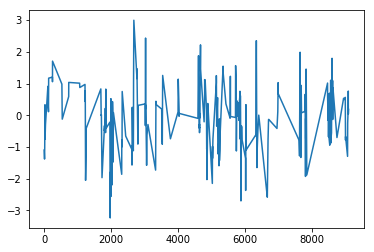

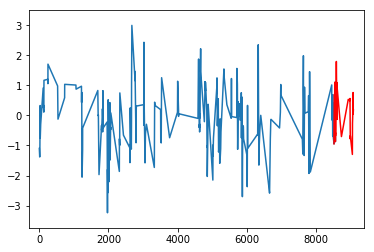

In [5]:
import matplotlib.pyplot as plt

#plt.subplot(211)
plt.plot(sT, y1)
plt.show()
#plt.subplot(212)
plt.plot(str, ytr)
plt.axis([-n, np.max(sT)+n, np.min(y1)-0.5, np.max(y1)+0.5])
plt.plot(ste, yte,color='red')
plt.show()

[-0.70176892  0.00632946  0.03307415  0.36430222 -0.66737775  0.30718345
  0.4313681   0.04833938 -0.14180953 -0.72679187]
[25.64036175 14.03959941  2.79353008  2.84801364  6.8706764   1.61024064
  7.24747362  3.1465641   1.58651579  1.38234567]


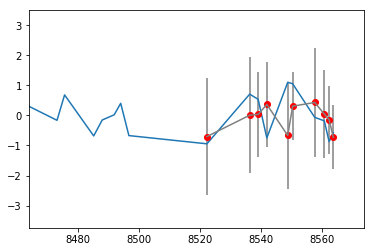

In [9]:
import scipy.stats
print(final[range(10),2])
print(final[range(10),3])
yerr=scipy.stats.norm.ppf(0.975)*np.sqrt(1-Mod**(2*final[range(10),3]))
plt.plot(str, ytr)
plt.axis([np.max(str)-100, np.max(str)+10, np.min(y1)-0.5, np.max(y1)+0.5])
#plt.plot(ste[range(10)], yte[range(10)],"o",color='red')
plt.plot(ste[range(10)], final[range(10),2],"o",color='red')
plt.errorbar(ste[range(10)], final[range(10),2], yerr=yerr,color="gray")
plt.show()